**5.5**

In Chapter 4, we used logistic regression to predict the probability of
 default using income and balance on the Default data set. We will
 now estimate the test error of this logistic regression model using the
 validation set approach. Do not forget to set a random seed before
 beginning your analysis.

In [124]:
import random
from ISLP import load_data
import statsmodels.api as sm
from ISLP.models import (ModelSpec as MS,summarize)
import numpy as np
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
    (LinearDiscriminantAnalysis as LDA,
    QuadraticDiscriminantAnalysis as QDA)
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.base import clone

random.seed(1000)
default = load_data('Default')
X = default[['balance','income']]
default['default01'] = np.where(default.default == 'No',0,1)
y = default['default01']
default

,default,student,balance,income,default01
0,No,No,729.526495,44361.625074,0
1,No,Yes,817.180407,12106.134700,0
2,No,No,1073.549164,31767.138947,0
3,No,No,529.250605,35704.493935,0
4,No,No,785.655883,38463.495879,0
...,...,...,...,...,...
9995,No,No,711.555020,52992.378914,0
9996,No,No,757.962918,19660.721768,0
9997,No,No,845.411989,58636.156984,0
9998,No,No,1569.009053,36669.112365,0


a.

 Fit a logistic regression model that uses income and balance to
 predict $\verb|default|$.

In [125]:
mod = LogisticRegression(random_state=0).fit(X,y)
mod.coef_

array([[5.64710265e-03, 2.08089741e-05]])

b.

Using the validation set approach, estimate the test error of this
 model. In order to do this, you must perform the following steps:

i.  Split the sample set into a training set and a validation set

In [126]:
default.shape

(10000, 5)

In [127]:
default_train, default_valid = train_test_split(default,test_size=5000,random_state=0)

ii.  Fit a multiple logistic regression model using only the training observations.

In [128]:
y_train = default_train['default01']
X_train = default_train[['balance','income']]
model = LogisticRegression(random_state=0).fit(X_train,y_train)

iii.   Obtain a prediction of default status for each individual in
 the validation set by computing the posterior probability of
 default for that individual, and classifying the individual to
 the default category if the posterior probability is greater
 than 0.5.

In [129]:
X_valid = default_valid[['balance','income']]
y_valid = default_valid['default01']
valid_pred = model.predict(X_valid)
labels = np.array([0]*5000)
labels[valid_pred>0.5] = 1

iv.  Compute the validation set error, which is the fraction of
 the observations in the validation set that are misclassified.

In [130]:
1-accuracy_score(labels,y_valid)

0.029000000000000026

c.

Repeat the process in (b) three times, using three different splits
 of the observations into a training set and a validation set. Comment on the results obtained.


In [131]:
#test size 20%
default_train, default_valid = train_test_split(default,test_size=2000,random_state=0)

y_train = default_train['default01']
X_train = default_train[['balance','income']]
model = LogisticRegression(random_state=0).fit(X_train,y_train)

X_valid = default_valid[['balance','income']]
y_valid = default_valid['default01']
valid_pred = model.predict(X_valid)
labels = np.array([0]*2000)
labels[valid_pred>0.5] = 1

1-np.mean(labels == y_valid)

0.028000000000000025

In [132]:
#test size = 1000
default_train, default_valid = train_test_split(default,test_size=1000,random_state=0)

y_train = default_train['default01']
X_train = default_train[['balance','income']]
model = LogisticRegression(random_state=0).fit(X_train,y_train)

X_valid = default_valid[['balance','income']]
y_valid = default_valid['default01']
valid_pred = model.predict(X_valid)
labels = np.array([0]*default_valid.shape[0])
labels[valid_pred>0.5] = 1

1-np.mean(labels == y_valid)

0.030000000000000027

In [133]:
#test size = 2180
default_train, default_valid = train_test_split(default,test_size=2180,random_state=0)

y_train = default_train['default01']
X_train = default_train[['balance','income']]
model = LogisticRegression(random_state=0).fit(X_train,y_train)

X_valid = default_valid[['balance','income']]
y_valid = default_valid['default01']
valid_pred = model.predict(X_valid)
labels = np.array([0]*default_valid.shape[0])
labels[valid_pred>0.5] = 1

1-np.mean(labels == y_valid)

0.02752293577981646

d.

Now consider a logistic regression model that predicts the probability of default using income, balance, and a dummy variable
 for student. Estimate the test error for this model using the validation set approach. Comment on whether or not including a
 dummy variable for student leads to a reduction in the test error
 rate.

In [134]:
default['student01'] = np.where(default.student == 'Yes',1,0)
default_train, default_valid = train_test_split(default, test_size=5000, random_state=0)

name = MS(['balance','income','student01'])
X_train = default_train[['balance','income','student01']]
y_train = default_train['default01']
mod = LogisticRegression(random_state=0).fit(X_train,y_train)

X_valid = default_valid[['balance','income','student01']]
y_valid = default_valid['default01']
valid_pred = mod.predict(X_valid)
labels = np.array([0]*default_valid.shape[0])
labels[valid_pred>0.5] = 1

1-np.mean(labels == y_valid)

0.02939999999999998

<Axes: >

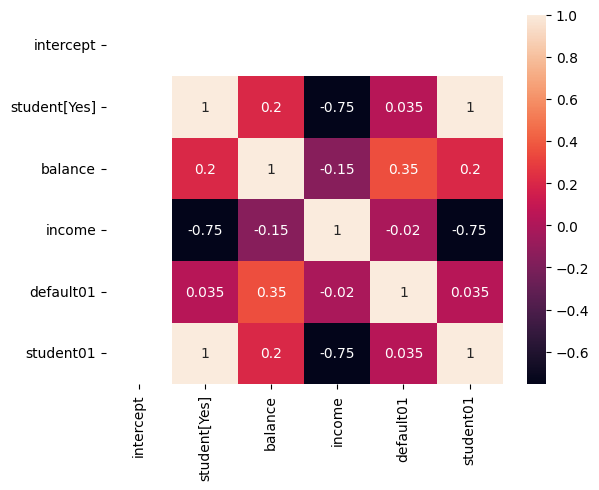

In [135]:
def_new = default.columns.drop('default','student')
def_new = MS(def_new).fit_transform(default)
X = def_new[['intercept','student01','balance','income']]
y = default['default01']
sns.heatmap(def_new.corr(),annot=True)

In [136]:
glm=sm.GLM(y,X,family=sm.families.Binomial())
res=glm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              default01   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9996
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -785.77
Date:                Tue, 11 Feb 2025   Deviance:                       1571.5
Time:                        17:27:17   Pearson chi2:                 7.00e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1262
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -10.8690      0.492    -22.079      0.000     -11.834      -9.904
student01     -0.6468      0.236     -2.738      0.006      -1.110      -0.184
balance        0.0057      0.000     24.737      0.000       0.005       0.006
income      3.033e-06    8.2e-06      0.370      0.712    -1.3e-05    1.91e-05
==============================================================================
"""

No adding in a dummt variable that includes student, it doesn't reduce the test error it either remains the same or gets a little bit worse

**5.6**

We continue to consider the use of a logistic regression model to predict the probability of default using income and balance on the Default data set. In particular, we will now compute estimates for the standard errors of the income and balance logistic regression coefficients in two different ways: (1) using the bootstrap, and (2) using the standard formula for computing the standard errors in the sm.GLM() function. Do not forget to set a random seed before beginning your analysis.

In [137]:
import random
from ISLP import load_data
import statsmodels.api as sm
from ISLP.models import (ModelSpec as MS,summarize)
import numpy as np
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
    (LinearDiscriminantAnalysis as LDA,
    QuadraticDiscriminantAnalysis as QDA)
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from functools import partial

random.seed(1000)
default = load_data('Default')
default['default01'] = np.where(default.default == 'Yes',1,0)

a.

Using the summarize() and sm.GLM() functions, determine the
 estimated standard errors for the coefficients associated with
 income and balance in a multiple logistic regression model that
 uses both predictors.

In [138]:
allvars = MS(['balance','income'])
X = allvars.fit_transform(default)
y = default['default01']
mod = sm.GLM(y,X, family=sm.families.Binomial()).fit()
summarize(mod)

,coef,std err,z,P>|z|
intercept,-11.540500,0.435000,-26.544,0.0
balance,0.005600,0.000000,24.835,0.0
income,0.000021,0.000005,4.174,0.0


In [139]:
mod.bse

intercept    0.434772
balance      0.000227
income       0.000005
dtype: float64

b.

Write a function, boot_fn(), that takes as input the Default data
 set as well as an index of the observations, and that outputs
 the coefficient estimates for income and balance in the multiple
 logistic regression model.

In [140]:
def Boot_fn(model_matrix, response, D, idx):
    np.random.default_rng(0)
    D_ = D.loc[idx]
    Y_ = D_[response]
    X_ = clone(model_matrix).fit_transform(D_)
    return sm.GLM(Y_,X_,family=sm.families.Binomial()).fit().params

In [144]:
def boot_SE(func, D, n=None, B=1000, seed=0):
     rng = np.random.default_rng(seed)
     first_, second_ = 0, 0
     n = n or D.shape[0]
     for _ in range(B):
         idx = rng.choice(D.index, n, replace=True)
         value = func(D, idx)
         first_ += value
         second_ += value**2
     return np.sqrt(second_ / B- (first_ / B)**2)

c.

Following the bootstrap example in the lab, use your boot_fn()
 function to estimate the standard errors of the logistic regression
 coefficients for income and balance.

In [141]:
hp_func = partial(Boot_fn, MS(['balance','income']),'default01')

In [142]:
rng = np.random.default_rng(0)
np.array([hp_func(default,rng.choice(10000,10000,replace=True)) for _ in range(10)])

array([[-1.16416373e+01,  5.73877605e-03,  1.87775777e-05],
       [-1.27619965e+01,  6.16200434e-03,  3.20594655e-05],
       [-1.12850364e+01,  5.61832222e-03,  1.59221870e-05],
       [-1.09975828e+01,  5.41168597e-03,  1.40723398e-05],
       [-1.13173469e+01,  5.70216361e-03,  1.12728778e-05],
       [-1.17516107e+01,  5.83443562e-03,  1.85974460e-05],
       [-1.12884834e+01,  5.53172383e-03,  1.52822182e-05],
       [-1.13883312e+01,  5.70192972e-03,  1.73720495e-05],
       [-1.11098351e+01,  5.28010522e-03,  2.33921172e-05],
       [-1.10505563e+01,  5.46083916e-03,  1.50937413e-05]])

d.

Comment on the estimated standard errors obtained using the
 sm.GLM() function and using the bootstrap.

In [145]:
hp_se = boot_SE(hp_func,default, B=1000, seed=10)
hp_se

intercept    0.425280
balance      0.000227
income       0.000005
dtype: float64

Both methods work well when approximating the standard error for each parameter. Although one is a bit faster while the other may be unoptimized in code.

5.8

 We will now perform cross-validation on a simulated data set.

a.

Generate a simulated data set as follows:
$\verb|
 rng = np.random.default_rng(1) 
 x = rng.normal(size=100)
 y = x- 2 * x**2 + rng.normal(size=100)
 |
$
  In this data set, what is n and what is p? Write out the model
 used to generate the data in equation form.

In [72]:
import random
from ISLP import load_data
import statsmodels.api as sm
from ISLP.models import (ModelSpec as MS,summarize)
import numpy as np
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from ISLP.models import sklearn_sm
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
    (LinearDiscriminantAnalysis as LDA,
    QuadraticDiscriminantAnalysis as QDA)
from sklearn.model_selection import \
    (cross_validate,
     KFold,
     ShuffleSplit)
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from functools import partial

rng = np.random.default_rng(1) 
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)
x.shape[0]

100

n denotes the number of observations, so for this example $n=100$. p denotes the number of predictor and for this example $p=1$

$$
\textbf{X} = (\textbf{X}_{1},\textbf{X}_{2}, ... ,\textbf{X}_{100})^T 
$$
$$
\textbf{X}_i \sim \mathcal{N}(0,1), \forall i
$$
$$
\mathbf{Y} = \mathbf{X} - 2\mathbf{X}^2
$$

b.

Create a scatterplot of X against Y . Comment on what you find.

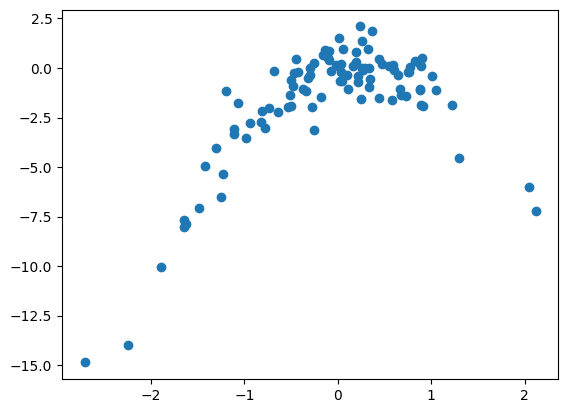

In [63]:
plt.scatter(x,y)

We see via the scatter plot that that it is definitely correlated and can be fit with a line such as $-x^2$

c.

Set a random seed, and then compute the LOOCV errors that
 result from fitting the following four models using least squares:

i. $Y=\beta_0 + \beta_{1}X + \epsilon$

In [64]:
random.seed(1000)
X = np.array((np.ones(x.shape[0]), x)).T
hp_model = sklearn_sm(sm.OLS)
cv_results = cross_validate(hp_model,X,y,cv=X.shape[0])

cv_err = np.mean(cv_results['test_score'])
cv_err

6.633029839181983

ii. $Y=\beta_0 + \beta_{1}X + \beta_{2}X^2 + \epsilon$

In [65]:
X = np.array((np.ones(x.shape[0]), x, x**2)).T
hp_model = sklearn_sm(sm.OLS)
cv_results = cross_validate(hp_model,X,y,cv=X.shape[0])

cv_err1 = np.mean(cv_results['test_score'])
cv_err1

1.122936856341969

iii. $Y=\beta_0 + \beta_{1}X + \beta_{2}X^2 + \beta_{3}X^3 + \epsilon$

In [66]:
X = np.array((np.ones(x.shape[0]), x, x**2, x**3)).T
hp_model = sklearn_sm(sm.OLS)
cv_results = cross_validate(hp_model,X,y,cv=X.shape[0])

cv_err2 = np.mean(cv_results['test_score'])
cv_err2

1.3017965489358867

iv. $Y=\beta_0 + \beta_{1}X + \beta_{2}X^2 + \beta_{3}X^3 + \beta_{4}X^4 + \epsilon$

In [67]:
X = np.array((np.ones(x.shape[0]), x, x**2, x**3, x**4)).T
hp_model = sklearn_sm(sm.OLS)
cv_results = cross_validate(hp_model,X,y,cv=X.shape[0])

cv_err3 = np.mean(cv_results['test_score'])
cv_err3

1.3323942694179325

Note you may find it helpful to use the data.frame() function
 to create a single data set containing both X and Y .

d.

 Repeat (c) using another random seed, and report your results.
 Are your results the same as what you got in (c)? Why?

In [68]:
random.seed(42)
X = np.array((np.ones(x.shape[0]), x)).T
hp_model = sklearn_sm(sm.OLS)
cv_results = cross_validate(hp_model,X,y,cv=X.shape[0])

cv_err = np.mean(cv_results['test_score'])
print(cv_err)

6.633029839181983


We have only removed one observation so there is no random effect thus LOOCV will always be the same regardless of random seed

e.

Which of the models in (c) had the smallest LOOCV error? Is
 this what you expected? Explain your answer.

**Ans:**

The qudratic form ii since our $y$ is modeled using a quadratic form. Yes it was expected since we modeled $\mathbf{Y}$ with a second order polynomial
_______________________________________________________________________________

f.

Comment on the statistical significance of the coefficient estimates that results from fitting each of the models in (c) using
 least squares. Do these results agree with the conclusions drawn based on the cross-validation results?

In [84]:
X1 = np.array((np.ones(x.shape[0]), x)).T
X2 = np.array((np.ones(x.shape[0]), x, x**2)).T
X3 = np.array((np.ones(x.shape[0]), x, x**2, x**3)).T
X4 = np.array((np.ones(x.shape[0]), x, x**2, x**3, x**4)).T
mod = sm.OLS(y,X1).fit()
print(summarize(mod))

     coef  std err      t  P>|t|
x1  2.097    0.334  6.284    0.0


In [85]:
mod = sm.OLS(y,X2).fit()
print(summarize(mod))

      coef  std err       t  P>|t|
x1  0.9571    0.125   7.653    0.0
x2 -2.0341    0.077 -26.484    0.0


In [81]:
mod = sm.OLS(y,X3).fit()
print(summarize(mod))

         coef  std err       t  P>|t|
const -0.0572    0.120  -0.477  0.635
x1     1.1146    0.187   5.945  0.000
x2    -2.0471    0.099 -20.673  0.000
x3    -0.0643    0.060  -1.070  0.287


In [82]:
mod = sm.OLS(y,X4).fit()
print(summarize(mod))

         coef  std err       t  P>|t|
const  0.1008    0.136   0.743  0.460
x1     0.9050    0.205   4.423  0.000
x2    -2.5059    0.221 -11.336  0.000
x3     0.0338    0.073   0.466  0.642
x4     0.1042    0.045   2.309  0.023


As we can see the only variable that are statistically significant are x1 and x2, which aligns with how $y$ was set up as

5.9

We will now consider the Boston housing data set, from the ISLP
 library.

In [2]:
import random
from ISLP import load_data
import statsmodels.api as sm
from ISLP.models import (ModelSpec as MS,summarize)
import numpy as np
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
    (LinearDiscriminantAnalysis as LDA,
    QuadraticDiscriminantAnalysis as QDA)
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from functools import partial

Boston = load_data('Boston')
Boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


a.

Based on this data set, provide an estimate for the population
 mean of medv. Call this estimate $\hat{\mu}$.

In [3]:
np.random.seed(42)
mu = Boston['medv'].mean()
mu

22.532806324110677

b.

Provide an estimate of the standard error of $\hat{\mu}$. Interpret this
 result.
 Hint: We can compute the standard error of the sample mean by
 dividing the sample standard deviation by the square root of the
 number of observations.

In [4]:
se = Boston['medv'].std()/np.sqrt(Boston.shape[0])
se

0.4088611474975351

In [12]:
rng = np.random.default_rng(42)
rng.choice(Boston['medv'].index,Boston['medv'].index[0])

array([], dtype=int64)

In [10]:
Boston['medv'].index[0]

0

c.

Now estimate the standard error of $\hat{\mu}$ using the bootstrap. How
 does this compare to your answer from (b)?

In [44]:
def Boot_mu(data,B=100,seed=42):
    rng = np.random.default_rng(seed)
    stde = []
    for _ in range(B):
        idx = rng.choice(data.index,data.shape[0])
        boot = data[idx]
        stde.append((boot.std()/np.sqrt(data.shape[0])))
    return sum(stde)/len(stde)

SE = Boot_mu(Boston['medv'])
SE

0.4081276239198879

We get approximately the same

d.

Based on your bootstrap estimate from (c), provide a 95% confidence interval for the mean of medv. Compare it to the results
 obtained by using Boston['medv'].std() and the two standard error rule (3.9).

In [23]:
print("The confidence interval is between [",mu - 2*SE,mu + 2*SE,"]")

The confidence interval is between [ 20.644784532767954 24.4208281154534 ]


e.

Based on this data set, provide an estimate, $\hat{\mu}_{med}$, for the median
 value of medv in the population.

In [19]:
mu_med = Boston['medv'].median()
mu_med

21.2

f.

We now would like to estimate the standard error of $\hat{\mu}_{med}$. Unfortunately, there is no simple formula for computing the standard
 error of the median. Instead, estimate the standard error of the
 median using the bootstrap. Comment on your findings.

In [38]:
median = []
for i in range(1000):
        median.append(Boston['medv'].sample(n=Boston.shape[0],replace=True).median())
boot_mu_med = np.std(median)
boot_

0.3832427429188969

since the standard error of the median is lower than the standard error of the mean then the data may be skewed or contains outliers

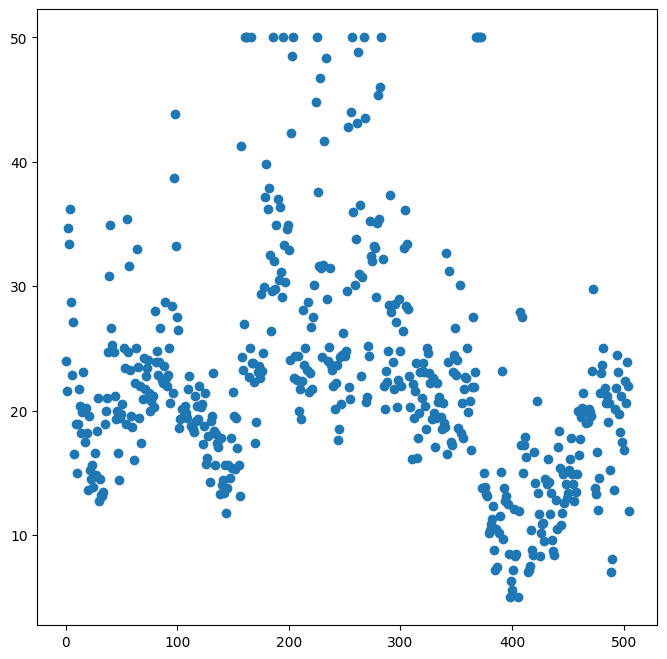

In [42]:
fig, ax = subplots(figsize=(8,8))
ax.scatter(range(0,len(Boston['medv'])),Boston['medv'])

g.

 Based on this data set, provide an estimate for the tenth per
centile of medv in Boston census tracts. Call this quantity $\hat{\mu}_{0.1}$.
 (You can use the np.percentile() function.)

In [35]:
mu_01 = np.percentile(Boston['medv'],10)
mu_01

12.75

h.

Use the bootstrap to estimate the standard error of $\hat{\mu}_{0.1}.$ Comment on your findings.

In [37]:
perc = []
for i in range(1000):
        perc.append(np.percentile(Boston['medv'].sample(n=Boston.shape[0],replace=True),10))
boot_mu_01 = np.std(perc)
boot_mu_01

0.5004916957353038

(array([ 57.,  92., 108., 119., 126., 125., 118., 110.,  91.,  54.]),
 array([-1.96735425, -1.57262507, -1.17789589, -0.78316671, -0.38843753,
         0.00629165,  0.40102083,  0.79575001,  1.19047919,  1.58520837,
         1.97993755]),
 <BarContainer object of 10 artists>)

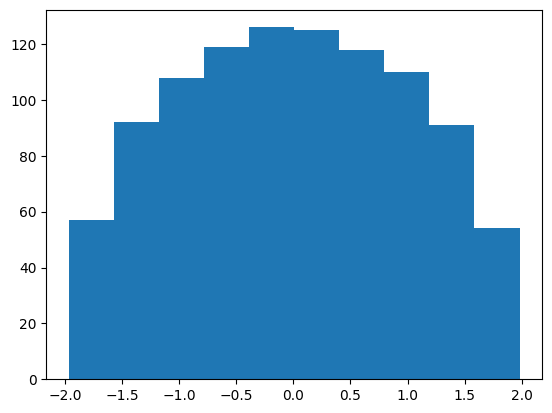

In [5]:
import numpy as np
import matplotlib.pyplot as plt

n=1000
A = np.random.randn(n,n)
GOE = (A+A.T)/np.sqrt(2*n)
eig = np.linalg.eigvals(GOE)
plt.hist(eig)